<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv as csv
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
with open('./sat_scores.csv', mode='rU') as file:
    reader = csv.reader(file)
    reader = [rows for rows in reader]
file.close()

In [3]:
# creating a list without the header
sat = reader[1:]

# converting numbers in 'sat' dataframe to integers from strings
sat= [[int(i) if i.isdigit() == True else i for i in sub] for sub in sat]

# insert the header back to the dataframe
sat.insert(0,reader[0])
sat[:3]

[['State', 'Rate', 'Verbal', 'Math'],
 ['CT', 82, 509, 510],
 ['NJ', 81, 499, 513]]

In [4]:
# transposing my data set
sat_t = map(list,zip(*sat))

# creating a dictionary
mydict = {rows[0]:rows[1:] for rows in sat_t}
print mydict

{'Math': [510, 513, 515, 505, 516, 499, 499, 506, 500, 501, 499, 510, 499, 489, 501, 488, 474, 526, 499, 527, 499, 515, 510, 517, 525, 515, 542, 439, 539, 512, 542, 553, 542, 589, 550, 545, 572, 589, 580, 554, 568, 561, 577, 562, 596, 550, 570, 603, 582, 599, 551, 514], 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': [82, 81, 79, 77, 72, 71, 71, 69, 69, 68, 67, 65, 65, 63, 60, 57, 56, 55, 54, 53, 53, 52, 51, 51, 34, 33, 31, 26, 23, 18, 17, 13, 13, 12, 12, 11, 11, 9, 9, 9, 8, 8, 8, 7, 6, 6, 5, 5, 4, 4, 4, 45], 'Verbal': [509, 499, 511, 495, 520, 501, 500, 511, 506, 510, 501, 508, 493, 491, 499, 486, 482, 526, 498, 527, 493, 485, 514, 498, 523, 509, 539, 534, 539, 527, 543, 562, 551, 576, 550, 547, 561, 580, 

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [5]:
mydict_df = pd.DataFrame(mydict)

# re-arranging my columns to be similar to the csv file
mydict_df = mydict_df[['State','Rate','Verbal','Math']]
print mydict_df.head()
print mydict_df.dtypes

  State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516
State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object


In [6]:
sat_df = pd.read_csv('./sat_scores.csv')
print sat_df.head()
print sat_df.dtypes

  State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516
State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object


In [7]:
sat_df.head()

State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516

In [8]:
# removing the 'All' row as it is not a state
sat_df.drop(51,inplace = True)

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [9]:
sat_df.head(10)

State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516
5    RI    71     501   499
6    PA    71     500   499
7    VT    69     511   506
8    ME    69     506   500
9    VA    68     510   501

1. Rate refers to the participation rate of the state
2. Verbal and Math refers to the average verbal and math score of the state

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [10]:
data_dict = { 'columns': list(sat_df.columns), 'type':['object','int64','int64','int64'], \
            'desc':['US states','participation rate of the state','avg verbal score of the state',\
                    'average math score of the state'],'shape':sat_df.shape}
print data_dict

{'shape': (51, 4), 'type': ['object', 'int64', 'int64', 'int64'], 'columns': ['State', 'Rate', 'Verbal', 'Math'], 'desc': ['US states', 'participation rate of the state', 'avg verbal score of the state', 'average math score of the state']}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

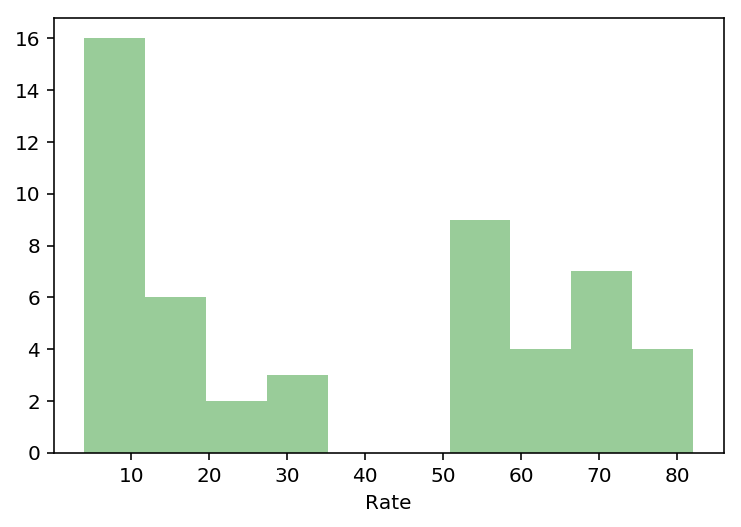

In [11]:
sns.distplot(sat_df['Rate'], bins = 10, kde = False, color = 'g')

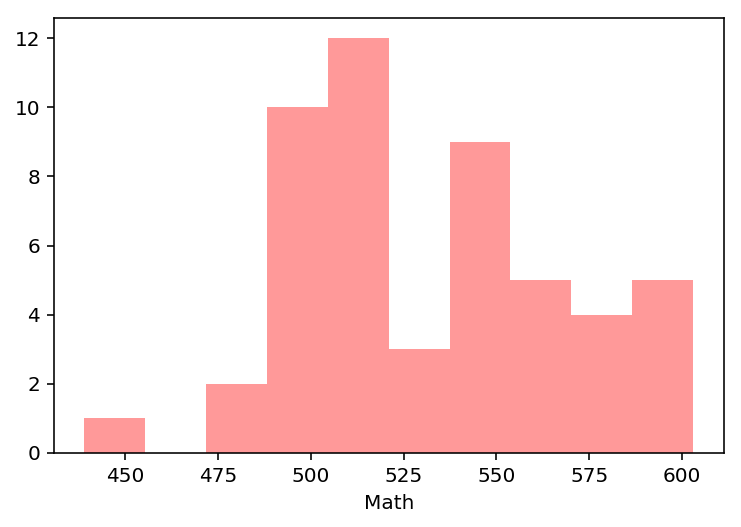

In [12]:
sns.distplot(sat_df['Math'], bins = 10, kde = False, color ='r')

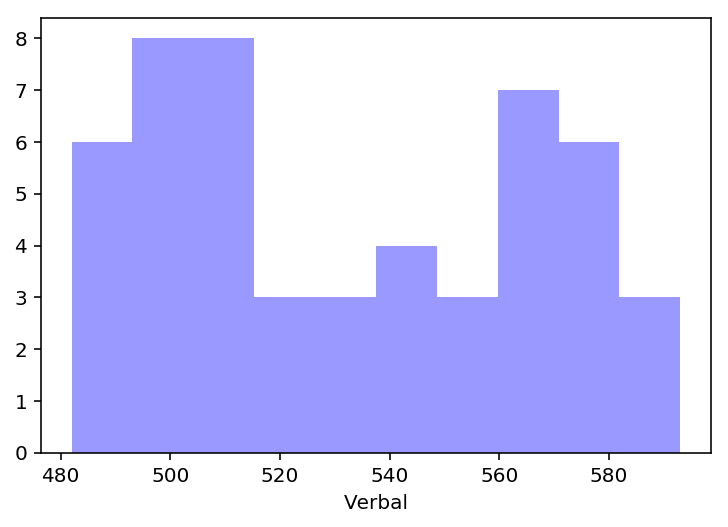

In [13]:
sns.distplot(sat_df['Verbal'], bins = 10, kde = False, color = 'b')

In [14]:
sns.distplot(sat_df['Math'], bins = 10, kde = False, color = 'r')
sns.distplot(sat_df['Verbal'], bins = 10, kde = False, color = 'g')

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

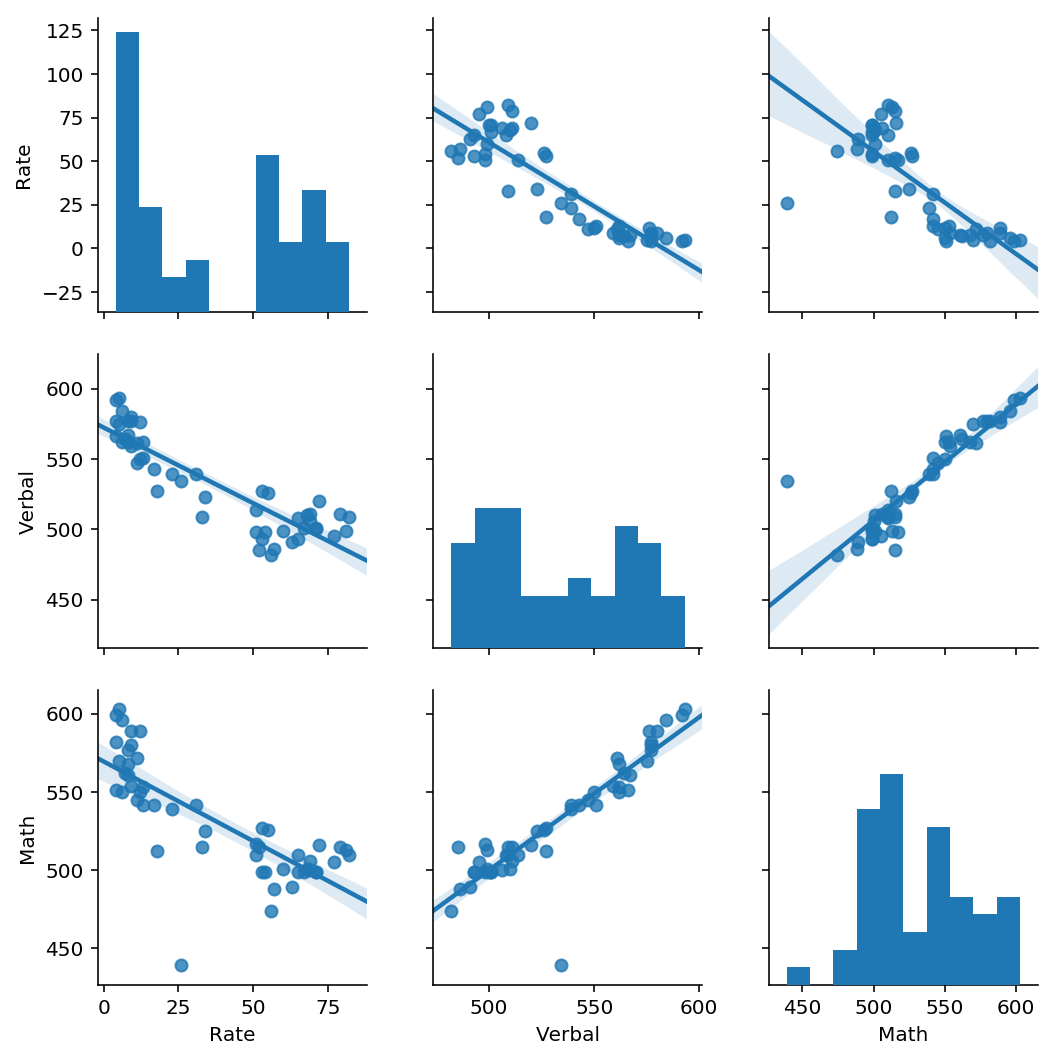

In [15]:
sns.pairplot(sat_df, kind = 'reg')

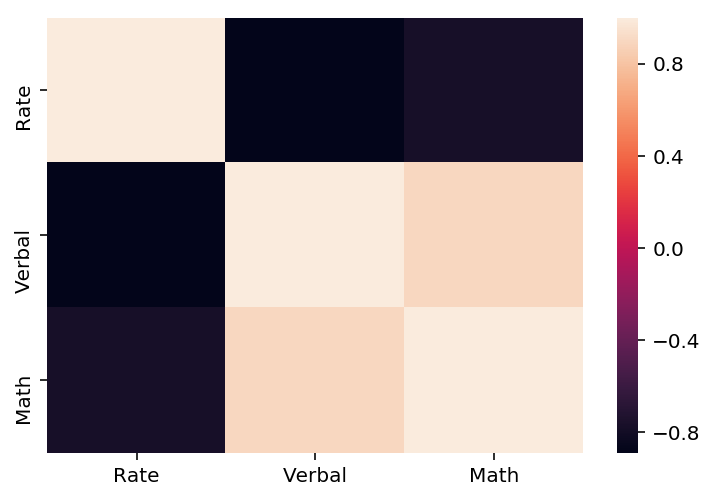

In [16]:
sns.heatmap(sat_df.corr())

- We can see that verbal and math have a positive correlation
- Other pairs have a negative correlation 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

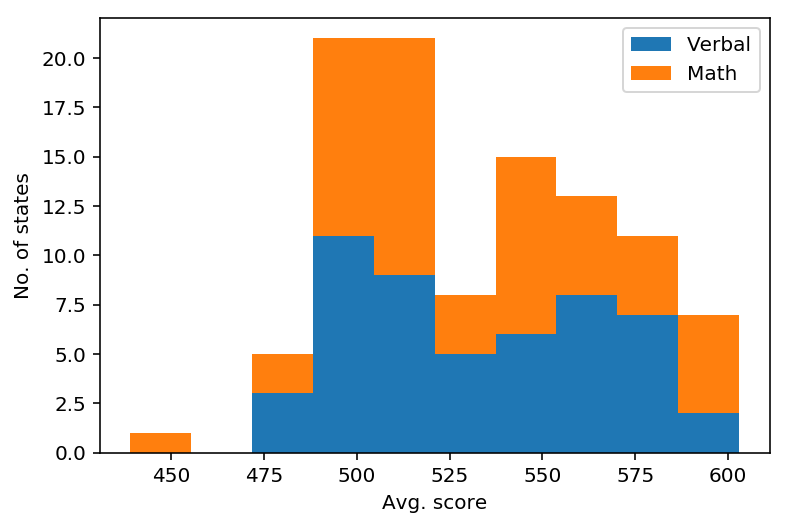

In [17]:
sat_df[['Verbal', 'Math']].plot(kind='hist', stacked = True, bins = 10 )
plt.ylabel('No. of states')
plt.xlabel('Avg. score')

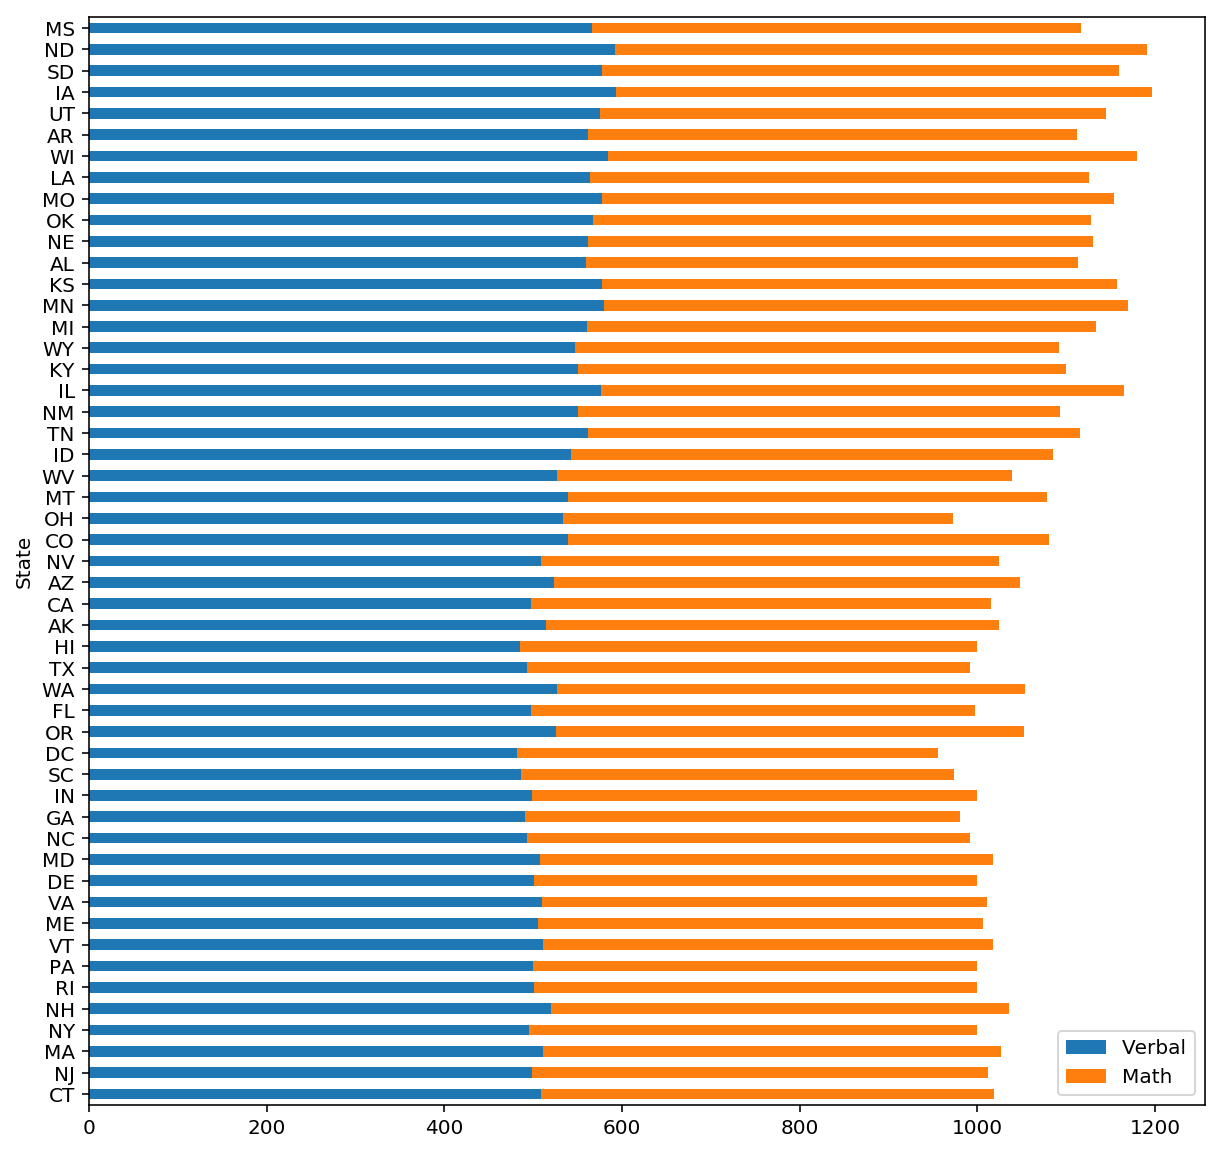

In [18]:
graph = sat_df[['Verbal', 'Math']].plot(kind = 'barh', stacked = True, figsize = (10,10), x = sat_df['State'] )

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots




#### What are the benefits of using a boxplot as compared to a scatterplot or a histogram?
1. The 25th, 50th and 75th percentile of each variable is easily identifiable
2. Mean of each variable is easily identifiable
3. The spread of the datapoints of each variable can be easily observed

#### What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?
The scale of Rate is different from Math and Verbal

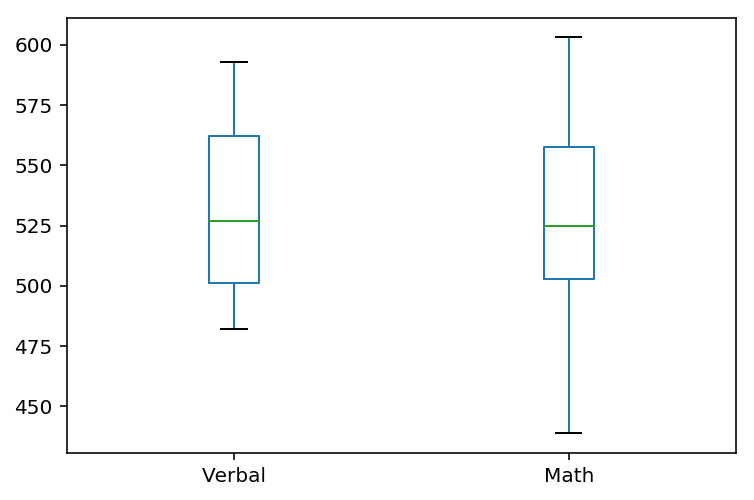

In [19]:
sat_df[['Verbal', 'Math']].plot(kind = 'box')

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


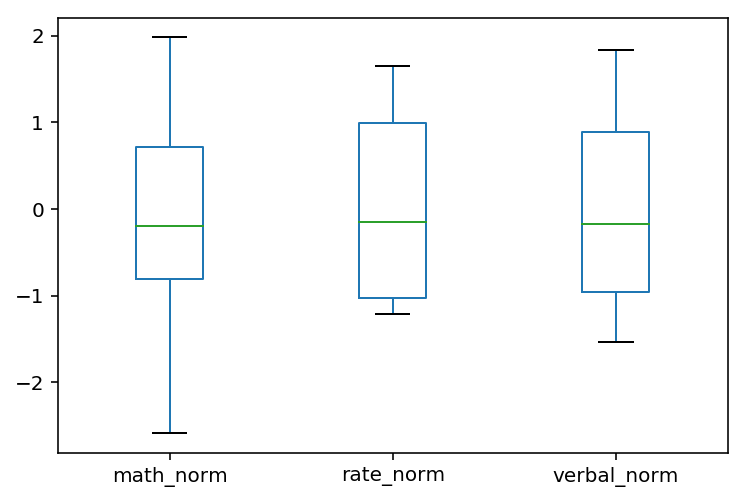

In [20]:
rate_norm = [(i-np.mean(sat_df['Rate']))/np.std(sat_df['Rate']) for i in sat_df['Rate']]
math_norm = [(i-np.mean(sat_df['Math']))/np.std(sat_df['Math']) for i in sat_df['Math']]
verbal_norm = [(i-np.mean(sat_df['Verbal']))/np.std(sat_df['Verbal']) for i in sat_df['Verbal']]
sat_norm = pd.DataFrame({'rate_norm':rate_norm, 'verbal_norm':verbal_norm, 'math_norm':math_norm})
sat_norm.plot(kind = 'box')

By normalising the values of all three variables by taking the difference between each value and variable mean divided by standard deviation variable, they would be on a similar scale.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [21]:
above_mean = sat_df[sat_df['Verbal'] > sat_df['Verbal'].mean()]
print list(above_mean['State'])
print len(above_mean['State'])
print sat_df['Verbal'].mean()

['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']
24
532.529411765


#### How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?

24 states are above the mean. Just calculating the mean does not tells us much about the distribution of Verbal scores. We would need to calculate the median to conclude whether Verbal score is normally distributed or is it skewed

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [22]:
above_median = sat_df[sat_df['Verbal'] > sat_df['Verbal'].median()]
print list(above_median['State'])
print len(above_median['State'])
print sat_df['Verbal'].mean()

['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']
24
532.529411765


In [23]:
list(above_median['State']) == list(above_mean['State'])

True

List of states greater than mean of verbal scores is the same of list of states greater than median of verbal scores.

The mean and median of verbal scores are very similar. It shows that verbal score is normally distributed.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [24]:
sat_df['Verbal-Math'] = sat_df['Verbal'] - sat_df['Math']
sat_df.head()

State  Rate  Verbal  Math  Verbal-Math
0    CT    82     509   510           -1
1    NJ    81     499   513          -14
2    MA    79     511   515           -4
3    NY    77     495   505          -10
4    NH    72     520   516            4

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [25]:
sat_df1 = sat_df[sat_df['Verbal-Math'] >0].sort_values('Verbal-Math',ascending = False).head(10)
sat_df1.reset_index(inplace=True)
sat_df1

index State  Rate  Verbal  Math  Verbal-Math
0     27    OH    26     534   439           95
1     29    WV    18     527   512           15
2     50    MS     4     566   551           15
3     45    AR     6     562   550           12
4     31    TN    13     562   553            9
5      9    VA    68     510   501            9
6     32    NM    13     551   542            9
7     16    DC    56     482   474            8
8     41    OK     8     567   561            6
9      8    ME    69     506   500            6

In [26]:
sat_df2 = sat_df[sat_df['Verbal-Math'] <0].sort_values('Verbal-Math',ascending = True).head(10)
sat_df2.reset_index(inplace=True)
sat_df2

index State  Rate  Verbal  Math  Verbal-Math
0     21    HI    52     485   515          -30
1     23    CA    51     498   517          -19
2      1    NJ    81     499   513          -14
3     33    IL    12     576   589          -13
4     44    WI     6     584   596          -12
5     36    MI    11     561   572          -11
6     47    IA     5     593   603          -10
7      3    NY    77     495   505          -10
8     37    MN     9     580   589           -9
9     49    ND     4     592   599           -7

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [27]:
sat_corr = sat_df[['Rate','Verbal','Math']].corr()
sat_corr

Rate    Verbal      Math
Rate    1.000000 -0.888121 -0.773419
Verbal -0.888121  1.000000  0.899909
Math   -0.773419  0.899909  1.000000

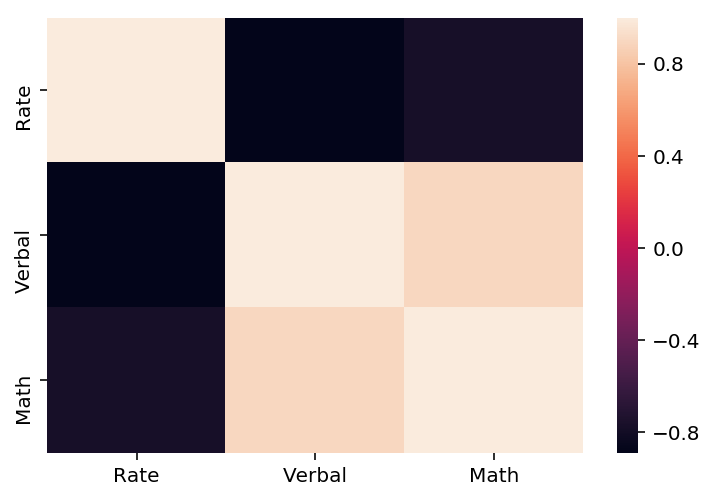

In [28]:
sns.heatmap(sat_corr, xticklabels=sat_corr.columns.values, yticklabels=sat_corr.columns.values)

1. Verbal and Math are positively correlated
2. The other pairs are negatively correlated

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [29]:
sat_df.describe()

Rate      Verbal        Math  Verbal-Math
count  51.000000   51.000000   51.000000    51.000000
mean   37.000000  532.529412  531.843137     0.686275
std    27.550681   33.360667   36.287393    15.839811
min     4.000000  482.000000  439.000000   -30.000000
25%     9.000000  501.000000  503.000000    -6.000000
50%    33.000000  527.000000  525.000000     0.000000
75%    64.000000  562.000000  557.500000     4.500000
max    82.000000  593.000000  603.000000    95.000000

- count: number of entry
- mean: mean of column
- std: standard deviation of column
- min: minimum value of column
- 25%: 25th percentile of column
- 50%: 50th percentile of column
- 75%: 75th percentile of column
- max: maximum value of column

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [30]:
sat_df.cov()

Rate       Verbal         Math  Verbal-Math
Rate         759.04  -816.280000  -773.220000   -43.060000
Verbal      -816.28  1112.934118  1089.404706    23.529412
Math        -773.22  1089.404706  1316.774902  -227.370196
Verbal-Math  -43.06    23.529412  -227.370196   250.899608

### Describe how the covariance matrix is different from the correlation matrix.
1. The values in the covariances matrix is much bigger than the correlation matrix.
2. The values of the matrix is dependable on how large the x and y values are.
3. It is hard to tell how strong the correlation is between two variables

### What is the process to convert the covariance into the correlation?
corr(xy) = cov(xy)/(std(x) * std(y))

### Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?
Both covariance and correlation tells us how two random variables vary with one another. However, it is hard to compare covariances over data sets with different scales. Furthermore, due to the wide range of covariance (depending on how large the x and y values are), it is hard to interpret how strongly correlated the two variables are. 

Correlation is a'normalized' version of covariance. It can take on any number from -1 to 1. As such, with its numerical limitation, we can determine how strongly correlated two variables are. Furthermore, correlation is not affected by scales

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [31]:
drug = pd.read_csv('./drug-use-by-age.csv')

In [32]:
drug.shape

(17, 28)

In [33]:
drug.head()

age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0  12  2798          3.9                3.0            1.1   
1  13  2757          8.5                6.0            3.4   
2  14  2792         18.1                5.0            8.7   
3  15  2956         29.2                6.0           14.5   
4  16  3058         40.1               10.0           22.5   

   marijuana-frequency  cocaine-use cocaine-frequency  crack-use  \
0                  4.0          0.1               5.0        0.0   
1                 15.0          0.1               1.0        0.0   
2                 24.0          0.1               5.5        0.0   
3                 25.0          0.5               4.0        0.1   
4                 30.0          1.0               7.0        0.0   

  crack-frequency        ...          oxycontin-use oxycontin-frequency  \
0               -        ...                    0.1                24.5   
1             3.0        ...                    0.1                41.0   
2               -        ...                    0.4                 4.5   
3             9.5        ...                    0.8                 3.0   
4             1.0        ...                    1.1                 4.0   

   tranquilizer-use  tranquilizer-frequency  stimulant-use  \
0               0.2                    52.0            0.2   
1               0.3                    25.5            0.3   
2               0.9                     5.0            0.8   
3               2.0                     4.5            1.5   
4               2.4                    11.0            1.8   

  stimulant-frequency  meth-use  meth-frequency  sedative-use  \
0                 2.0       0.0               -           0.2   
1                 4.0       0.1             5.0           0.1   
2                12.0       0.1            24.0           0.2   
3                 6.0       0.3            10.5           0.4   
4                 9.5       0.3            36.0           0.2   

  sedative-frequency  
0               13.0  
1               19.0  
2               16.5  
3               30.0  
4                3.0  

[5 rows x 28 columns]

In [34]:
drug.isnull().sum()
# there is no null entry

age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          0
crack-use                  0
crack-frequency            0
heroin-use                 0
heroin-frequency           0
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         0
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        0
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             0
sedative-use               0
sedative-frequency         0
dtype: int64

In [35]:
drug.info()

# object type in columns that should be float or integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [36]:
drug['age'].unique()

array(['12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22-23',
       '24-25', '26-29', '30-34', '35-49', '50-64', '65+'], dtype=object)

In [37]:
print drug['cocaine-frequency'].unique()
print drug['crack-frequency'].unique()
print drug['heroin-frequency'].unique()
print drug['inhalant-use'].unique()
print drug['oxycontin-frequency'].unique()
print drug['meth-frequency'].unique()

# need to remove '-' from these columns and convert the strings to float

['5.0' '1.0' '5.5' '4.0' '7.0' '8.0' '6.0' '15.0' '36.0' '-']
['-' '3.0' '9.5' '1.0' '21.0' '10.0' '2.0' '5.0' '17.0' '6.0' '15.0' '48.0'
 '62.0']
['35.5' '-' '2.0' '1.0' '66.5' '64.0' '46.0' '180.0' '45.0' '30.0' '57.5'
 '88.0' '50.0' '66.0' '280.0' '41.0' '120.0']
[ 1.6  2.5  2.6  3.   2.   1.8  1.4  1.5  1.   0.8  0.6  0.4  0.3  0.2  0. ]
['24.5' '41.0' '4.5' '3.0' '4.0' '6.0' '7.0' '7.5' '12.0' '13.5' '17.5'
 '20.0' '46.0' '5.0' '-']
['-' '5.0' '24.0' '10.5' '36.0' '48.0' '12.0' '105.0' '2.0' '46.0' '21.0'
 '30.0' '54.0' '104.0']


In [38]:
# replace '-' with null
drug.replace('-', np.NaN, inplace = True)

In [39]:
# convert string to float
drug['cocaine-frequency'] = [float(i) for i in drug['cocaine-frequency']]
drug['crack-frequency'] = [float(i) for i in drug['crack-frequency']]
drug['heroin-frequency'] = [float(i) for i in drug['heroin-frequency']]
drug['inhalant-use'] = [float(i) for i in drug['inhalant-use']]
drug['inhalant-frequency'] = [float(i) for i in drug['inhalant-frequency']]
drug['oxycontin-frequency'] = [float(i) for i in drug['oxycontin-frequency']]
drug['meth-frequency'] = [float(i) for i in drug['meth-frequency']]

In [40]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          16 non-null float64
crack-use                  17 non-null float64
crack-frequency            14 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           16 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         16 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

In [41]:
# filter out columns that are in percentages
percent_list = [i for i in list(drug.columns) if 'use' in i]

In [42]:
# check that columns that are in percentages are between 0 to 100%
drug.describe()[percent_list]

alcohol-use  marijuana-use  cocaine-use  crack-use  heroin-use  \
count    17.000000      17.000000    17.000000  17.000000   17.000000   
mean     55.429412      18.923529     2.176471   0.294118    0.352941   
std      26.878866      11.959752     1.816772   0.235772    0.333762   
min       3.900000       1.100000     0.000000   0.000000    0.000000   
25%      40.100000       8.700000     0.500000   0.000000    0.100000   
50%      64.600000      20.800000     2.000000   0.400000    0.200000   
75%      77.500000      28.400000     4.000000   0.500000    0.600000   
max      84.200000      34.000000     4.900000   0.600000    1.100000   

       hallucinogen-use  inhalant-use  pain-releiver-use  oxycontin-use  \
count         17.000000     17.000000          17.000000      17.000000   
mean           3.394118      1.388235           6.270588       0.935294   
std            2.792506      0.927283           3.166379       0.608216   
min            0.100000      0.000000           0.600000       0.000000   
25%            0.600000      0.600000           3.900000       0.400000   
50%            3.200000      1.400000           6.200000       1.100000   
75%            5.200000      2.000000           9.000000       1.400000   
max            8.600000      3.000000          10.000000       1.700000   

       tranquilizer-use  stimulant-use   meth-use  sedative-use  
count         17.000000      17.000000  17.000000     17.000000  
mean           2.805882       1.917647   0.382353      0.282353  
std            1.753379       1.407673   0.262762      0.138000  
min            0.200000       0.000000   0.000000      0.000000  
25%            1.400000       0.600000   0.200000      0.200000  
50%            3.500000       1.800000   0.400000      0.300000  
75%            4.200000       3.000000   0.600000      0.400000  
max            5.400000       4.100000   0.900000      0.500000

In [43]:
# filter out frequency usage columns
drug.columns = [i.replace('frequency','freq') if 'frequency' in i else i for i in drug.columns]
freq_list = [i for i in list(drug.columns) if 'freq' in i]

In [44]:
drug.describe()[freq_list]

alcohol-freq  marijuana-freq  cocaine-freq  crack-freq  heroin-freq  \
count     17.000000       17.000000     16.000000   14.000000    16.000000   
mean      33.352941       42.941176      7.875000   15.035714    73.281250   
std       21.318833       18.362566      8.038449   18.111263    70.090173   
min        3.000000        4.000000      1.000000    1.000000     1.000000   
25%       10.000000       30.000000      5.000000    5.000000    39.625000   
50%       48.000000       52.000000      5.250000    7.750000    53.750000   
75%       52.000000       52.000000      7.250000   16.500000    71.875000   
max       52.000000       72.000000     36.000000   62.000000   280.000000   

       hallucinogen-freq  inhalant-freq  pain-releiver-freq  oxycontin-freq  \
count          17.000000      16.000000           17.000000       16.000000   
mean            8.411765       6.156250           14.705882       14.812500   
std            15.000245       4.860448            6.935098       12.798275   
min             2.000000       2.000000            7.000000        3.000000   
25%             3.000000       3.375000           12.000000        5.750000   
50%             3.000000       4.000000           12.000000       12.000000   
75%             4.000000       6.625000           15.000000       18.125000   
max            52.000000      19.000000           36.000000       46.000000   

       tranquilizer-freq  stimulant-freq   meth-freq  sedative-freq  
count          17.000000       17.000000   15.000000      17.000000  
mean           11.735294       31.147059   35.966667      19.382353  
std            11.485205       85.973790   31.974581      24.833527  
min             4.500000        2.000000    2.000000       3.000000  
25%             6.000000        7.000000   12.000000       6.500000  
50%            10.000000       10.000000   30.000000      10.000000  
75%            11.000000       12.000000   47.000000      17.500000  
max            52.000000      364.000000  105.000000     104.000000

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [45]:
drug.head(1)

age     n  alcohol-use  alcohol-freq  marijuana-use  marijuana-freq  \
0  12  2798          3.9           3.0            1.1             4.0   

   cocaine-use  cocaine-freq  crack-use  crack-freq      ...        \
0          0.1           5.0        0.0         NaN      ...         

   oxycontin-use  oxycontin-freq  tranquilizer-use  tranquilizer-freq  \
0            0.1            24.5               0.2               52.0   

   stimulant-use  stimulant-freq  meth-use  meth-freq  sedative-use  \
0            0.2             2.0       0.0        NaN           0.2   

   sedative-freq  
0           13.0  

[1 rows x 28 columns]

In [46]:
drug.groupby('age')[percent_list].apply(np.sum).apply(np.sum)

alcohol-use          942.3
marijuana-use        321.7
cocaine-use           37.0
crack-use              5.0
heroin-use             6.0
hallucinogen-use      57.7
inhalant-use          23.6
pain-releiver-use    106.6
oxycontin-use         15.9
tranquilizer-use      47.7
stimulant-use         32.6
meth-use               6.5
sedative-use           4.8
dtype: float64

In [47]:
drug['age'].unique()

array(['12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22-23',
       '24-25', '26-29', '30-34', '35-49', '50-64', '65+'], dtype=object)

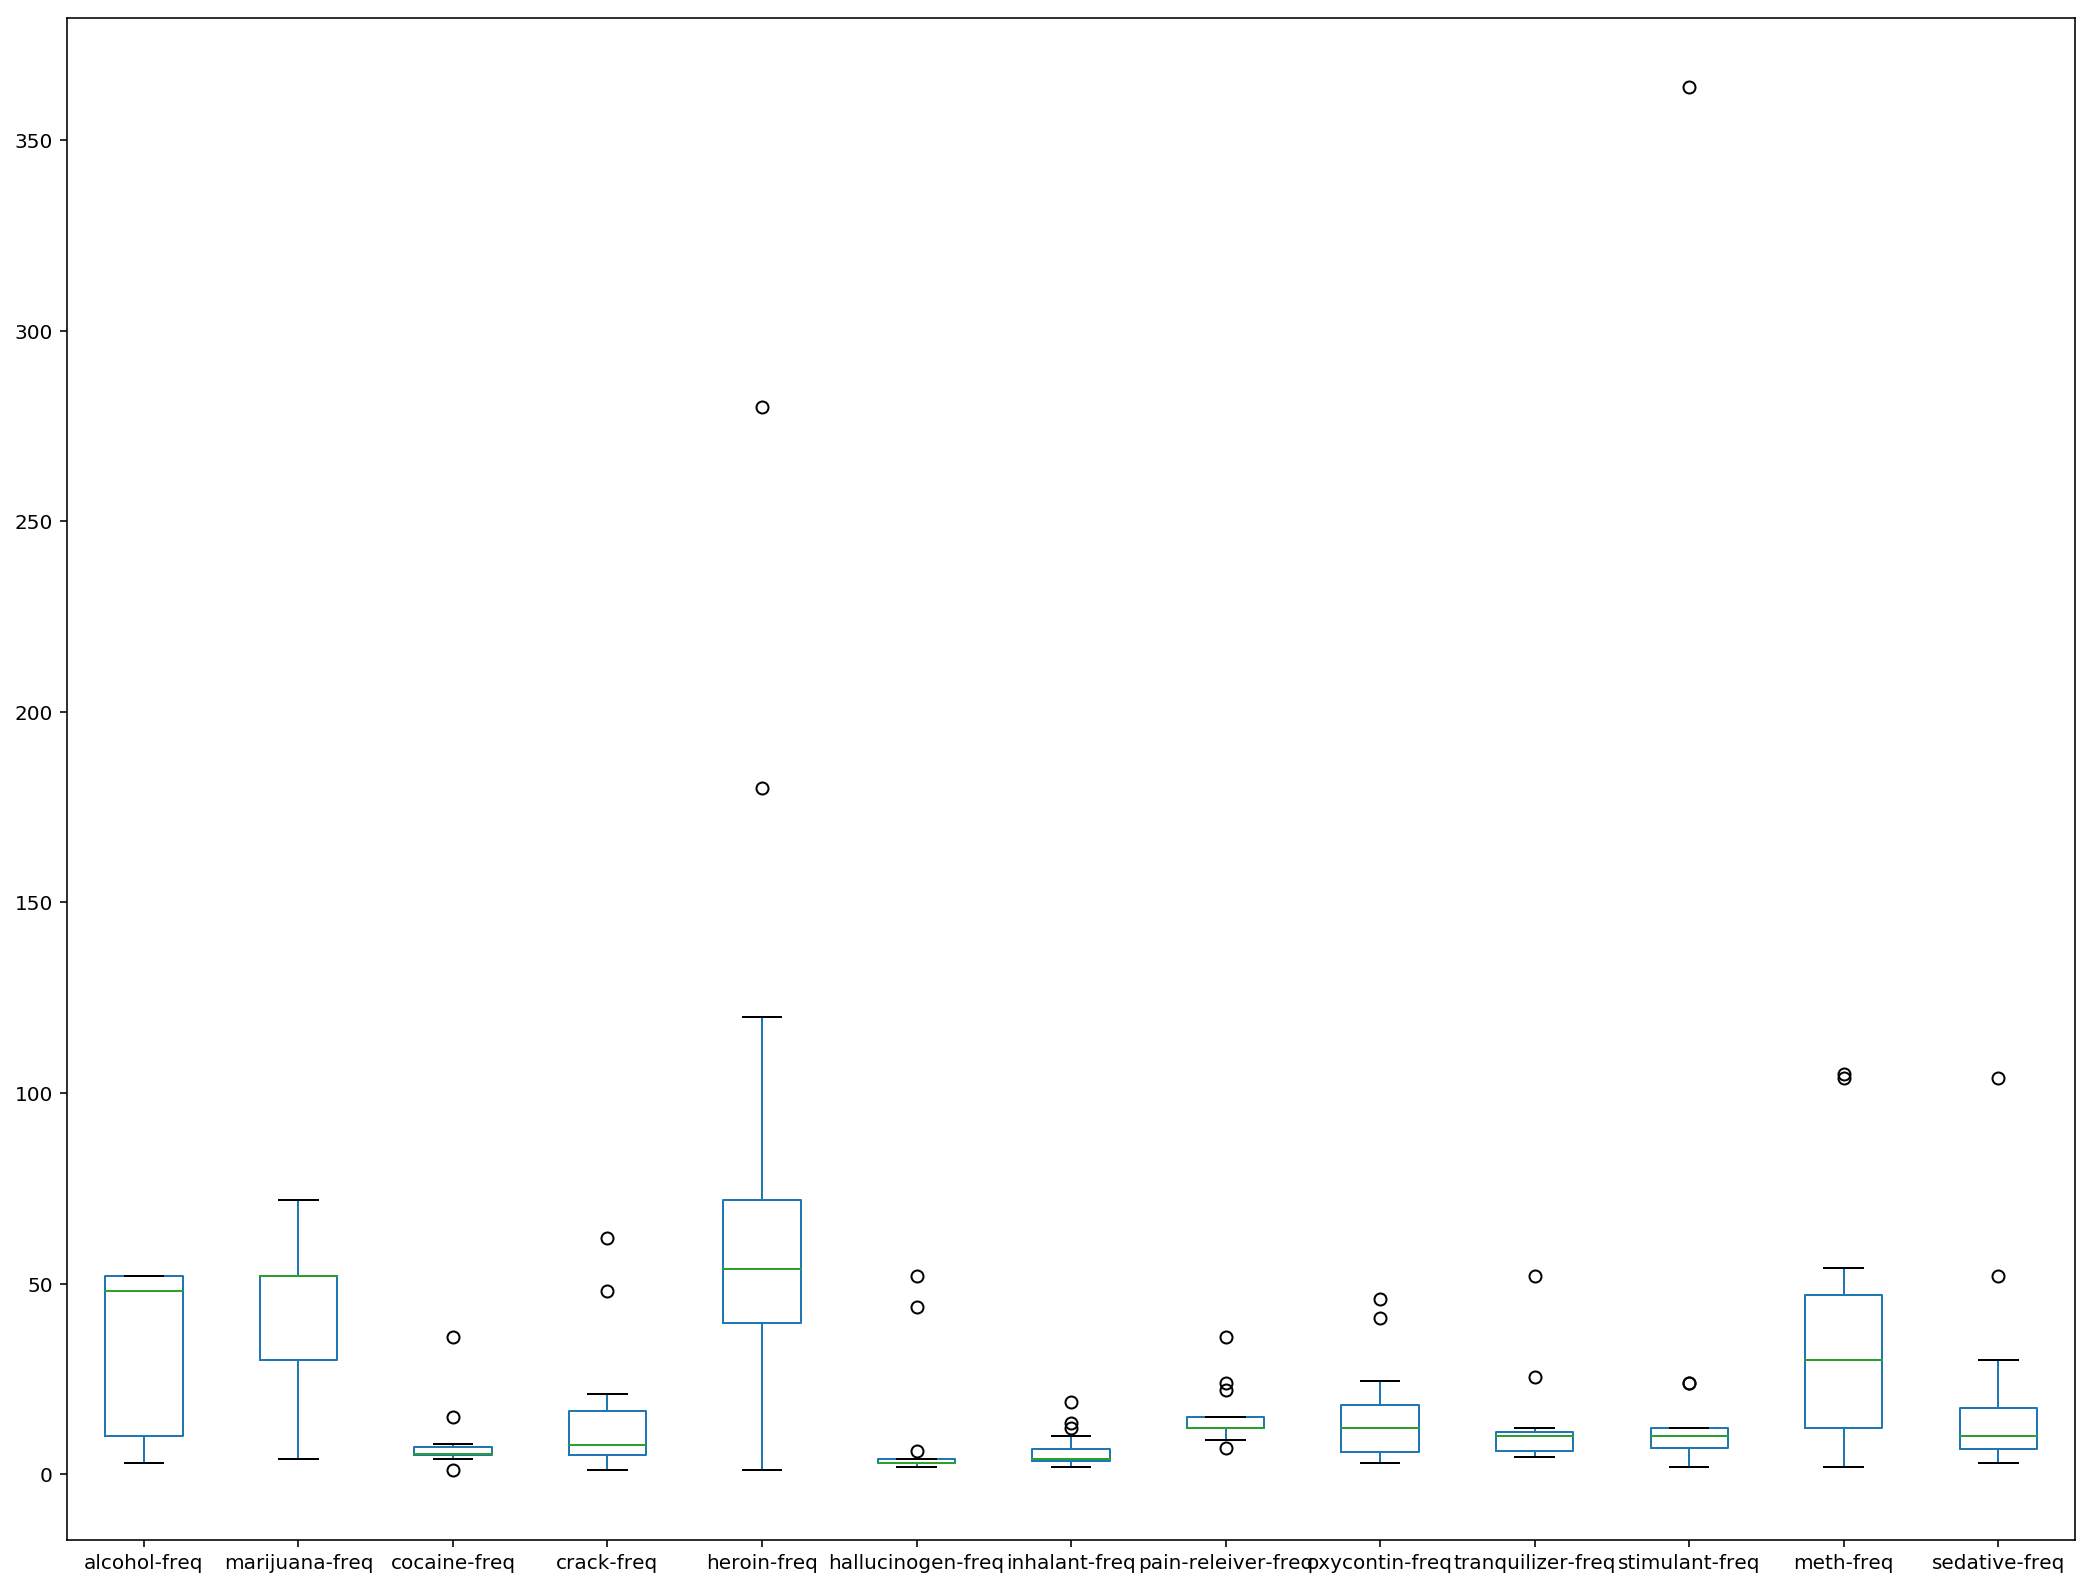

In [48]:
drug[freq_list].plot(kind = 'box', figsize = (18,14))

In [49]:
sns.pairplot(drug[percent_list])

In [50]:
drug_percent_corr = drug[percent_list].corr()

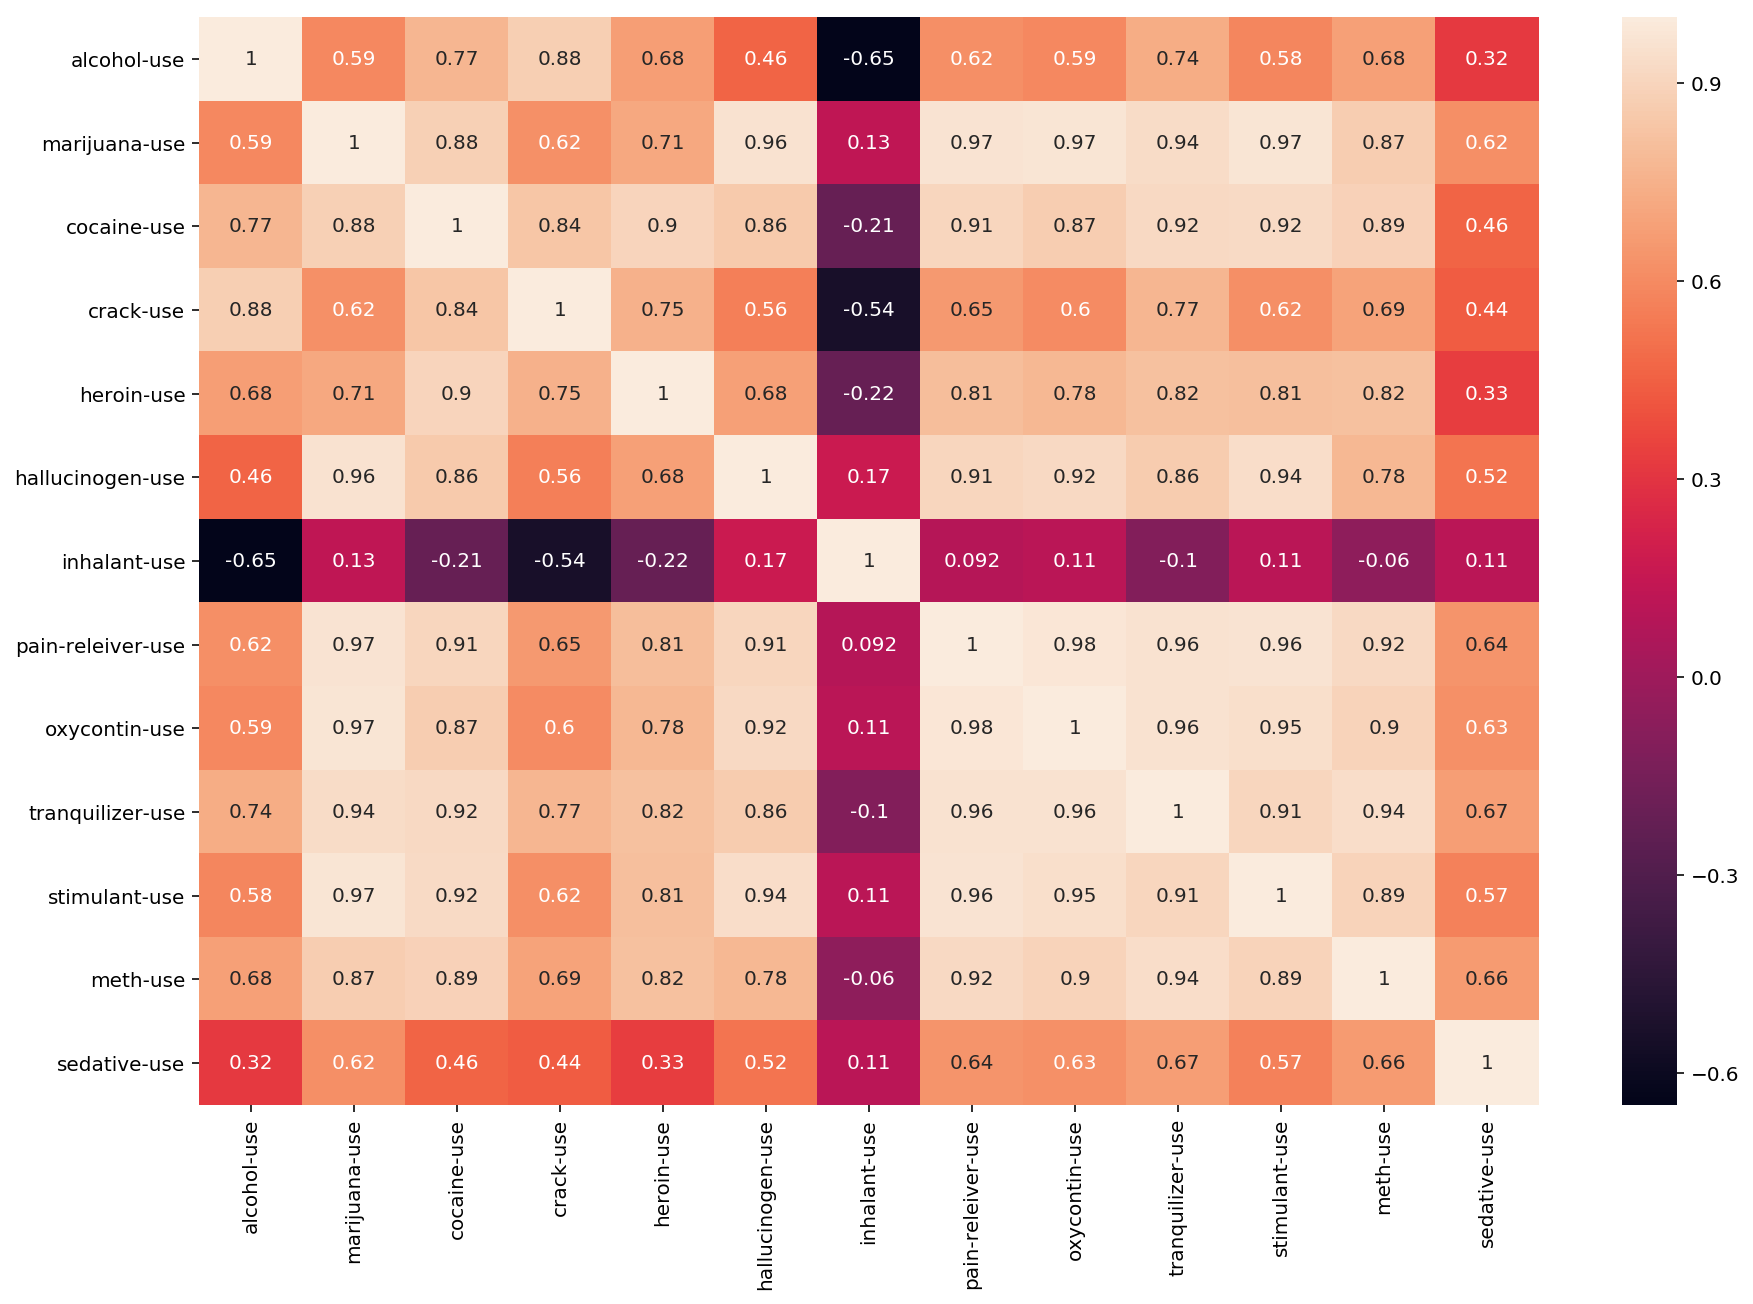

In [51]:
ax = plt.subplots(figsize=(15,10))
sns.heatmap(drug_percent_corr, annot = True)

In [52]:
drug_freq_corr = drug[freq_list].corr()

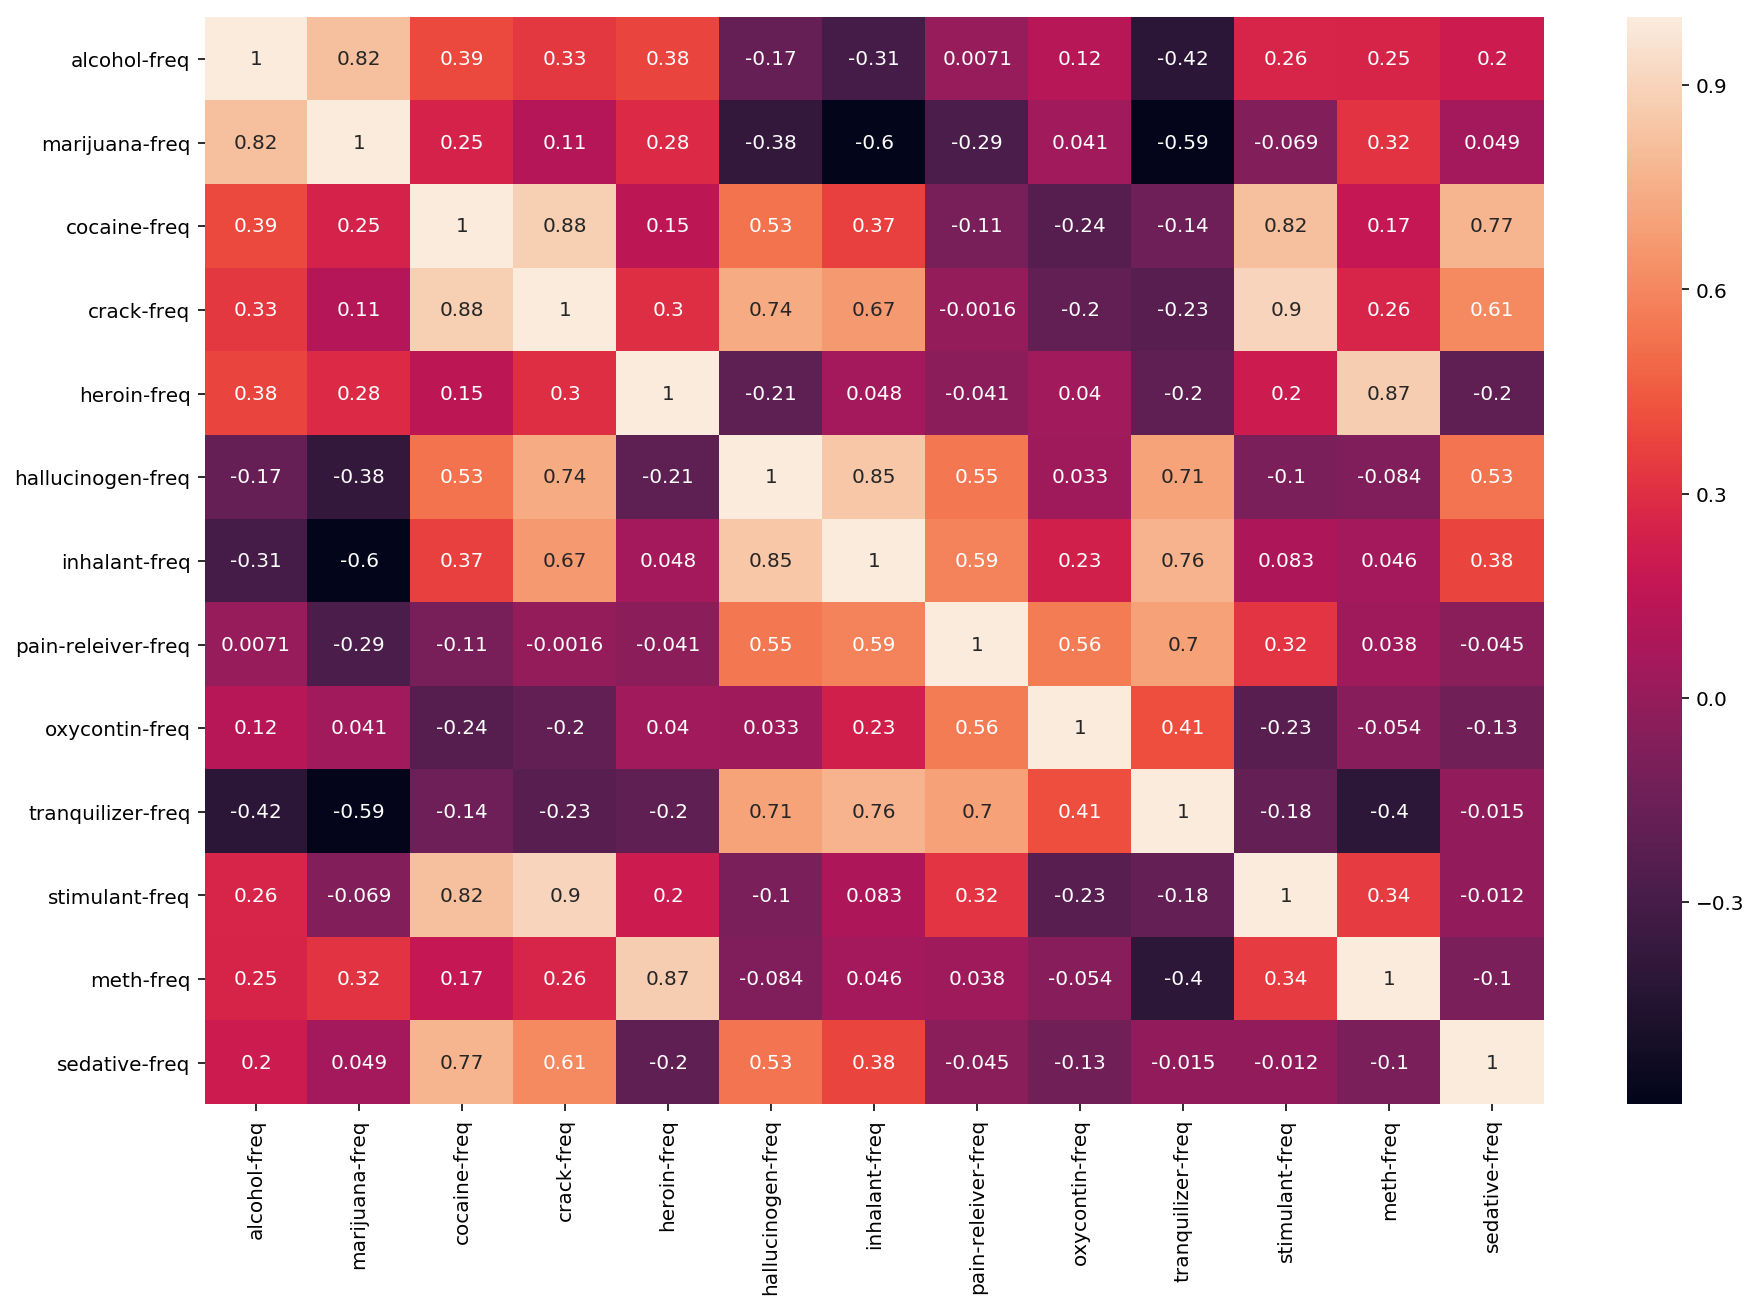

In [53]:
ax = plt.subplots(figsize=(15,10))
sns.heatmap(drug_freq_corr, annot=True)

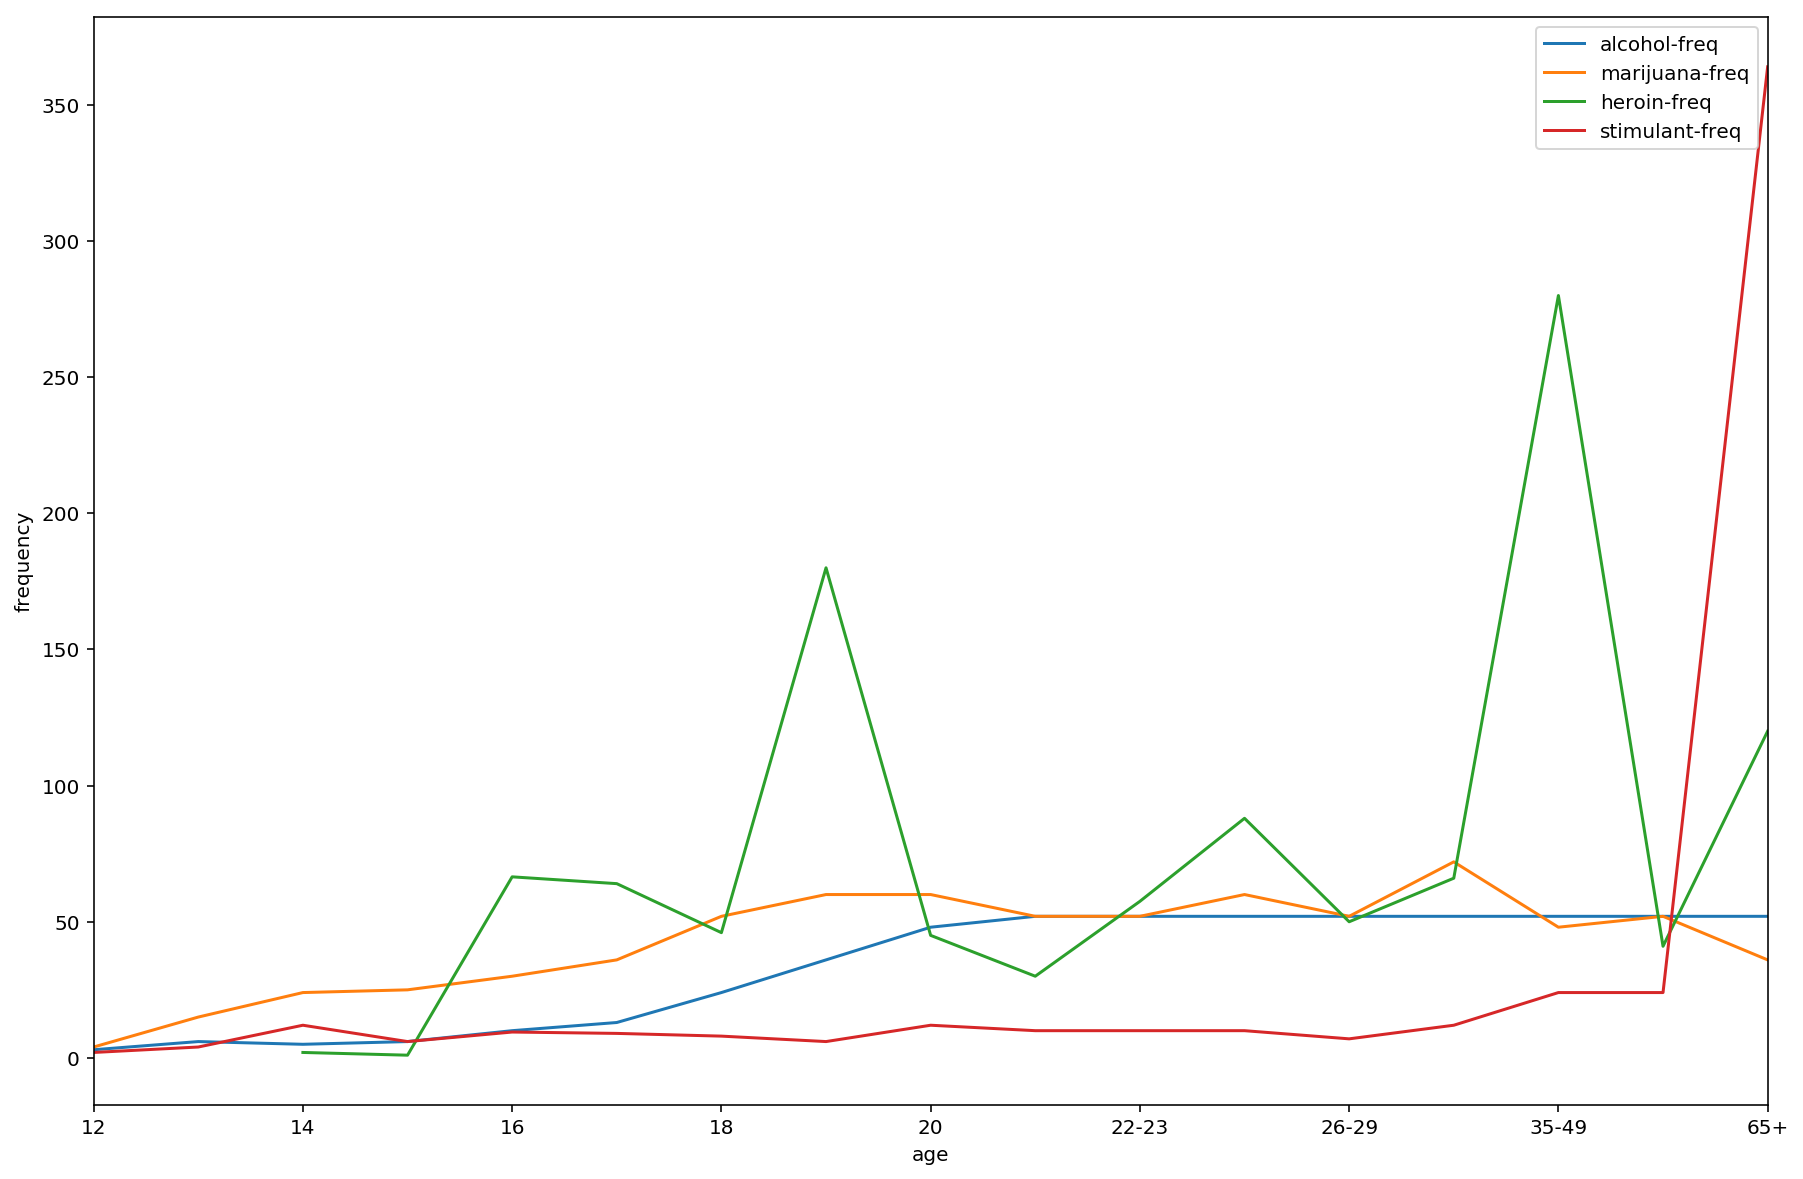

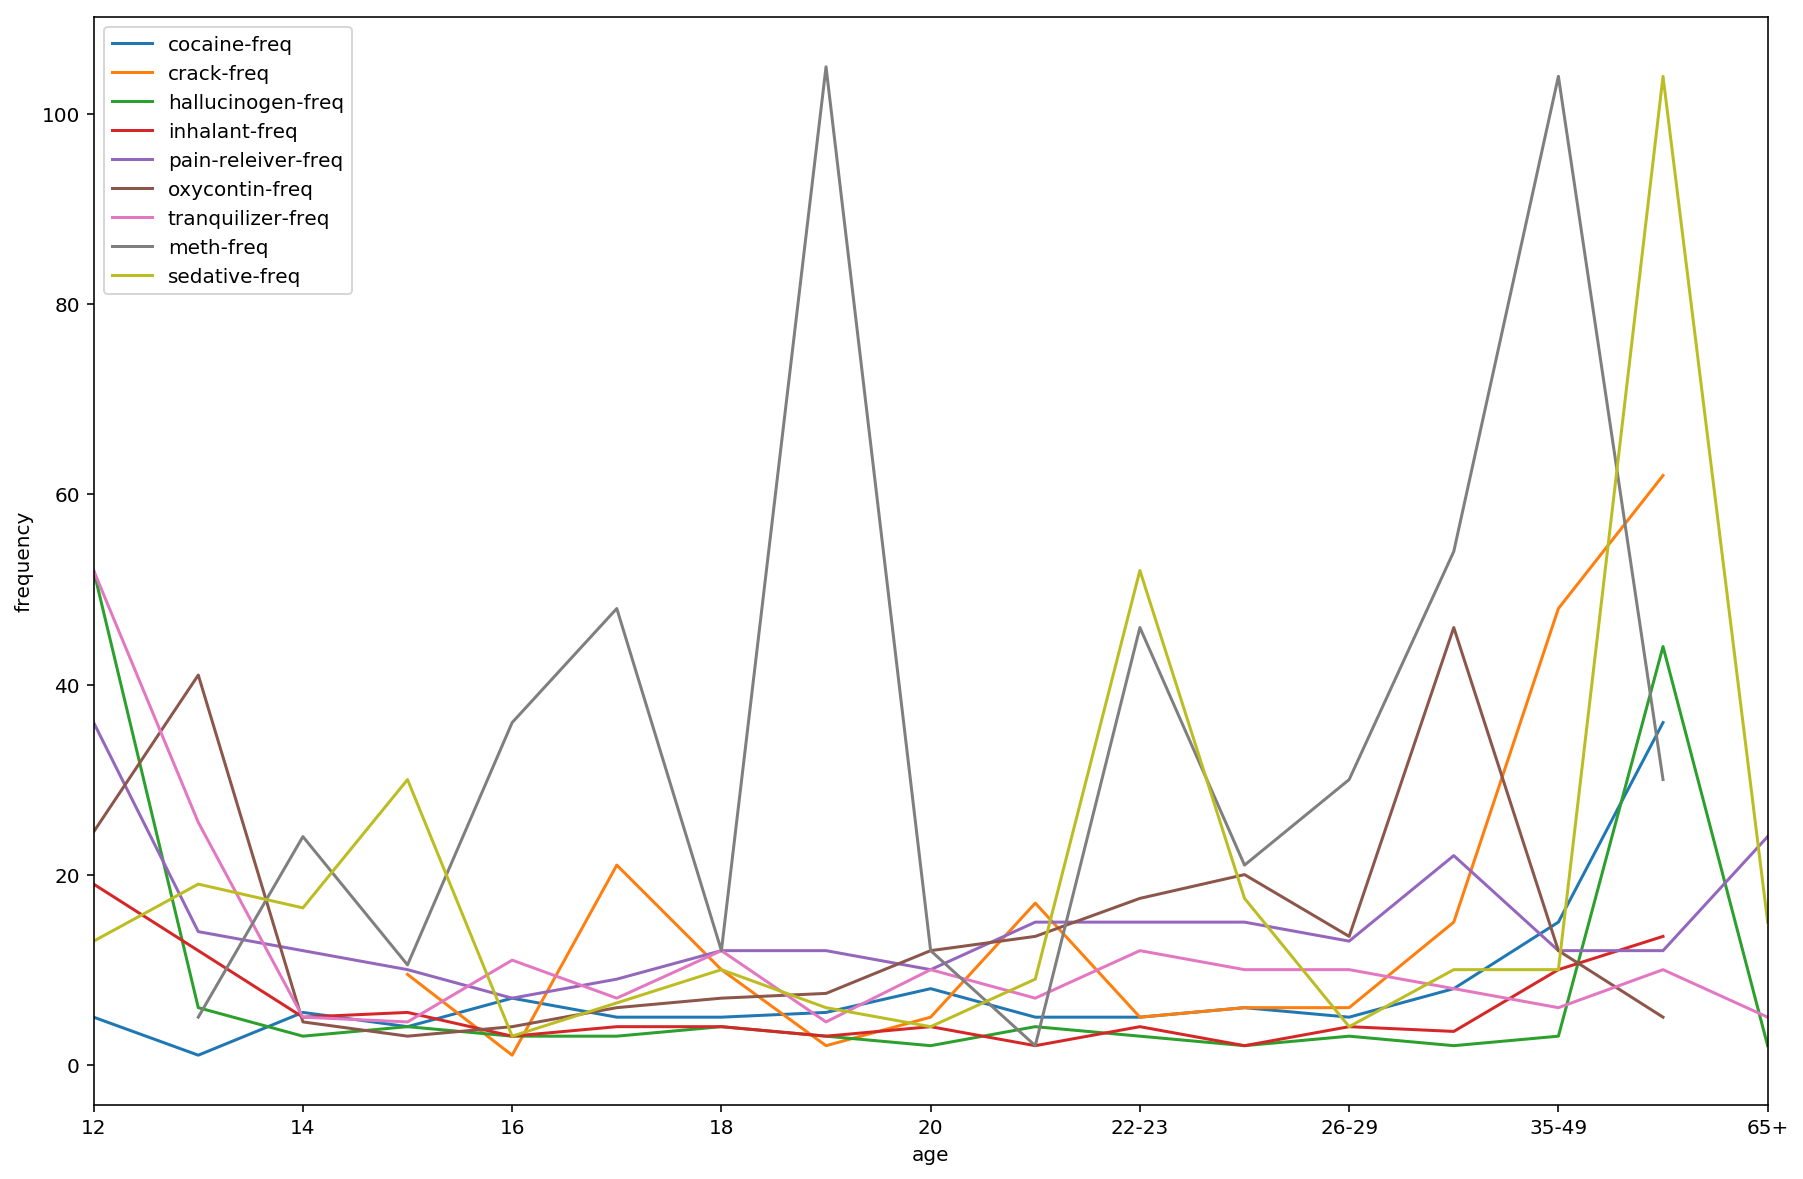

In [54]:
drug[['alcohol-freq','marijuana-freq','heroin-freq','stimulant-freq']].plot(kind = 'line', x = drug.age, figsize = (15,10))
plt.ylabel('frequency')
drug[[i for i in freq_list if i not in ['stimulant-freq','alcohol-freq','marijuana-freq','heroin-freq']]].plot(kind = 'line', x = drug.age, figsize=(15,10))
plt.ylabel('frequency')

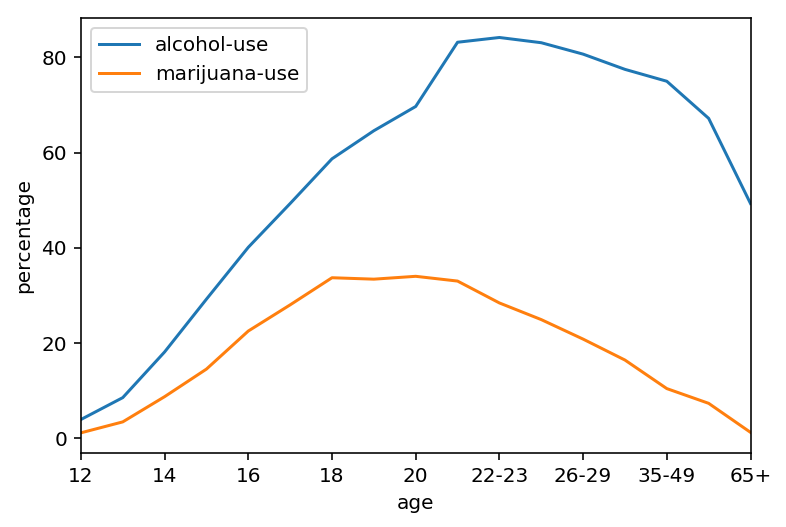

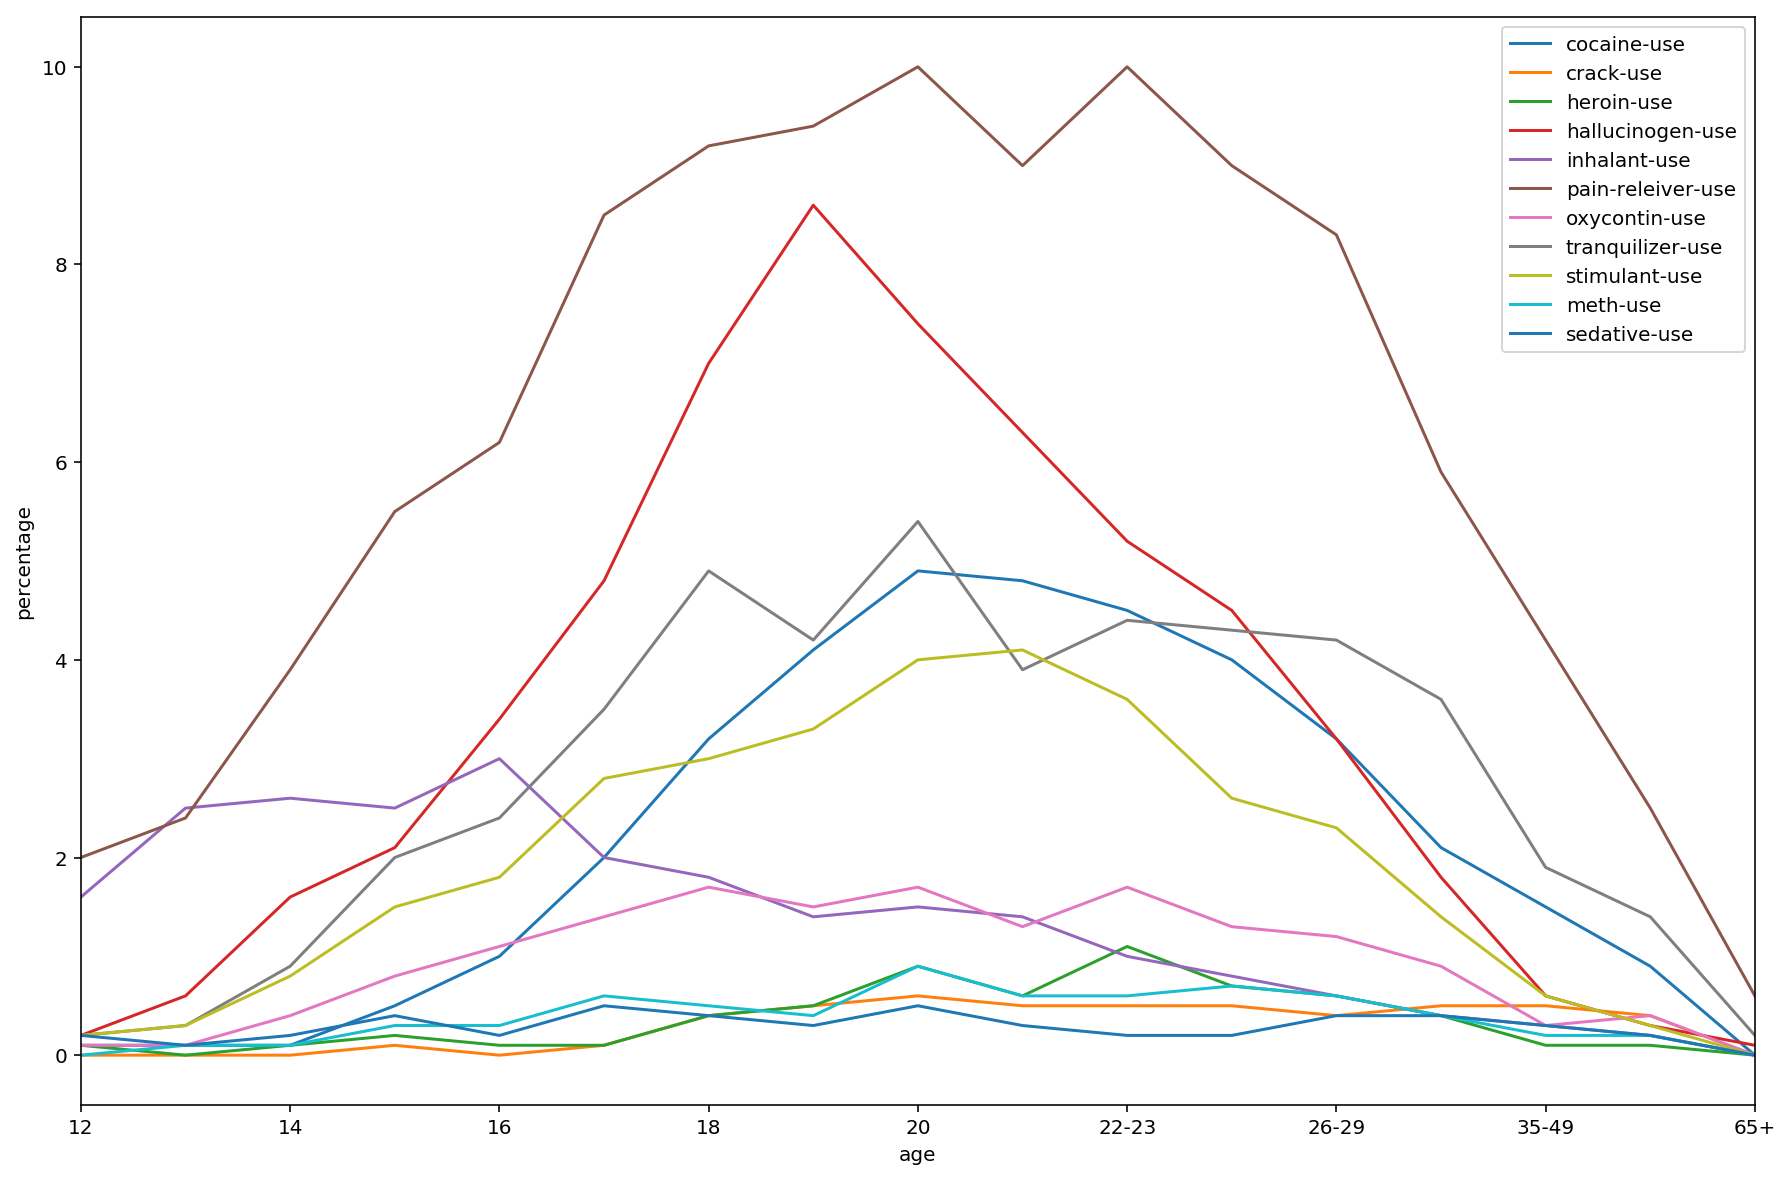

In [55]:
drug[['alcohol-use','marijuana-use']].plot(kind = 'line', x = drug.age)
plt.ylabel('percentage')
drug[[i for i in percent_list if i not in ['alcohol-use','marijuana-use']]].plot(kind = 'line', x = drug.age, figsize = (15,10))
plt.ylabel('percentage')

In [56]:
for a,b in zip(percent_list, freq_list):
    print 'Correlation between', a, 'and', b ,'is', drug[[a,b]].corr().iloc[0,1]

Correlation between alcohol-use and alcohol-freq is 0.897889293824
Correlation between marijuana-use and marijuana-freq is 0.615610201948
Correlation between cocaine-use and cocaine-freq is -0.163922061442
Correlation between crack-use and crack-freq is 0.173208333856
Correlation between heroin-use and heroin-freq is -0.121704058409
Correlation between hallucinogen-use and hallucinogen-freq is -0.427862652872
Correlation between inhalant-use and inhalant-freq is -0.0906205059359
Correlation between pain-releiver-use and pain-releiver-freq is -0.468617474777
Correlation between oxycontin-use and oxycontin-freq is -0.28828745712
Correlation between tranquilizer-use and tranquilizer-freq is -0.388953847793
Correlation between stimulant-use and stimulant-freq is -0.363357617814
Correlation between meth-use and meth-freq is -0.184711978153
Correlation between sedative-use and sedative-freq is -0.284234109215


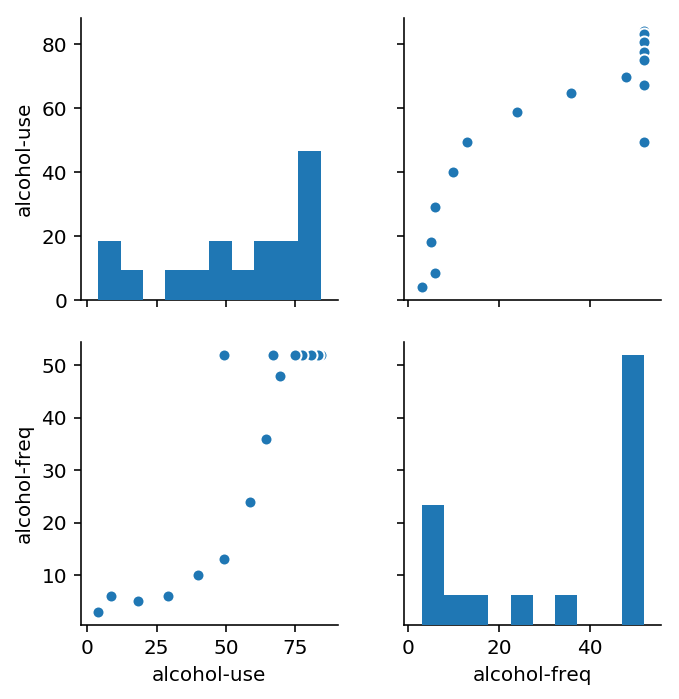

In [57]:
sns.pairplot(drug[['alcohol-use','alcohol-freq']])

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

### Question: Is using drugs independent with age?

- H0: using drugs and age are independent
- H1: using drugs and age are dependent

We would first need to determine the number of drug users and non-drug users in each age group

In [58]:
drug[percent_list].plot(kind ='line', x =drug.age, figsize = (15,8))

In [59]:
percent_drug_corr = drug[percent_list].corr()
percent_drug_corr[['alcohol-use','marijuana-use']][percent_drug_corr > 0.7]

alcohol-use  marijuana-use
alcohol-use           1.000000            NaN
marijuana-use              NaN       1.000000
cocaine-use           0.773458       0.883789
crack-use             0.877378            NaN
heroin-use                 NaN       0.711613
hallucinogen-use           NaN       0.959353
inhalant-use               NaN            NaN
pain-releiver-use          NaN       0.966226
oxycontin-use              NaN       0.971733
tranquilizer-use      0.735785       0.935199
stimulant-use              NaN       0.968096
meth-use                   NaN       0.870446
sedative-use               NaN            NaN

### Methodology to determine number of drug users:

Since alcohol has the most number of users in all of the age groups, we can assume that in most cases, the number of alcohol users is the maximum number of drug users in each age group. However, there are some exceptions because alcohol usage do not have a high correlation (>0.7) with some of the other drugs (marijuana, heroin, hallucinogen, inhalant, pain-reliever, oxycontin, simulant, meth, sedative).

I would treat alcohol users and these group of drug users as mutally exclusive. Since most of these drugs correlates highly with marijuana and marijuana is the second most used drugs behind alcohol, **number of drug users = alcohol users + marijuana users + inhalant users + sedative users**. Inhalant users and sedative users are added individually because they do not have a high correlation with either alcohol or marijuana. 


In [60]:
# obtaining the total percentage of drug-users in each age group
drug['drug-users'] = drug['alcohol-use'] + drug['marijuana-use'] + drug['inhalant-use'] + drug['sedative-use']

In [61]:
# creating another dataframe, containing just the age, n and drug-users columns
sub_drug = drug[['age', 'n','drug-users']]

# calculating the actual number of drug users in the sample n
sub_drug['drug-users'] = sub_drug['drug-users']/100 * sub_drug['n']

/Users/timong/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [62]:
sub_drug

age     n  drug-users
0      12  2798     190.264
1      13  2757     399.765
2      14  2792     826.432
3      15  2956    1377.496
4      16  3058    2012.164
5      17  3038    2424.324
6      18  2469    2335.674
7      19  2223    2216.331
8      20  2271    2400.447
9      21  2354    2775.366
10  22-23  4707    5356.566
11  24-25  4591    5004.190
12  26-29  2628    2693.700
13  30-34  2864    2712.208
14  35-49  7391    6356.260
15  50-64  3923    2938.327
16    65+  2448    1236.240

In [63]:
# we can see that some age groups have more drug users than corresponding n
# in these cases, we shall take n to be the number of drug users in affected age group
sub_drug['drug-users'] =[190.264, 399.765, 826.432, 1377.496, 2012.164, 2424.324, 2335.674, 2216.331, 2271, 2354, 4707, 4591, 2628, 2712.208, 6356.260, 2938.327, 1236.240]

# deriving the number of non-users
sub_drug['non-users'] = sub_drug['n'] - sub_drug['drug-users']

/Users/timong/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/timong/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [64]:
sub_drug.head()

age     n  drug-users  non-users
0  12  2798     190.264   2607.736
1  13  2757     399.765   2357.235
2  14  2792     826.432   1965.568
3  15  2956    1377.496   1578.504
4  16  3058    2012.164   1045.836

In [65]:
# chi-sq test is used because my variables are categorical
chisq_table = sub_drug[['drug-users', 'non-users']].as_matrix()
results = stats.chi2_contingency(chisq_table)
chi2 = results[0]
pvalue = results[1]
print chi2, pvalue

25592.8599742 0.0


### Since p-values is 0.0, we reject the null hypothesis that age and using drugs are independent. However, the result might be skewed to the huge proportion of alcohol users in certain age groups. As such, we shall re-do the chi-square test and ignore alcohol users.

### i.e. **number of drug users = marijuana users + inhalant users + sedative users**

In [66]:
drug2 = drug
drug2['drug-users'] = drug2['marijuana-use'] + drug2['inhalant-use'] + drug2['sedative-use']
drug2['drug-users'] = drug2['drug-users']/100 * drug2['n']
drug2['non-users'] = drug2['n'] - drug2['drug-users']
sub_drug2 = drug2[['age','n','drug-users','non-users']]

In [67]:
sub_drug2

age     n  drug-users  non-users
0      12  2798      81.142   2716.858
1      13  2757     165.420   2591.580
2      14  2792     321.080   2470.920
3      15  2956     514.344   2441.656
4      16  3058     785.906   2272.094
5      17  3038     926.590   2111.410
6      18  2469     886.371   1582.629
7      19  2223     780.273   1442.727
8      20  2271     817.560   1453.440
9      21  2354     816.838   1537.162
10  22-23  4707    1393.272   3313.728
11  24-25  4591    1189.069   3401.931
12  26-29  2628     572.904   2055.096
13  30-34  2864     492.608   2371.392
14  35-49  7391     813.010   6577.990
15  50-64  3923     302.071   3620.929
16    65+  2448      29.376   2418.624

In [68]:
chisq_table2 = sub_drug2[['drug-users', 'non-users']].as_matrix()
results = stats.chi2_contingency(chisq_table2)
chi2 = results[0]
pvalue = results[1]
print chi2, pvalue

4369.80023675 0.0


### P-value is still 0.0 and we still reject the null hypothesis.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [69]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10,5))
sns.swarmplot(y = sat_df['Verbal'], ax = ax1)
sns.swarmplot(y = sat_df['Math'], ax = ax2)

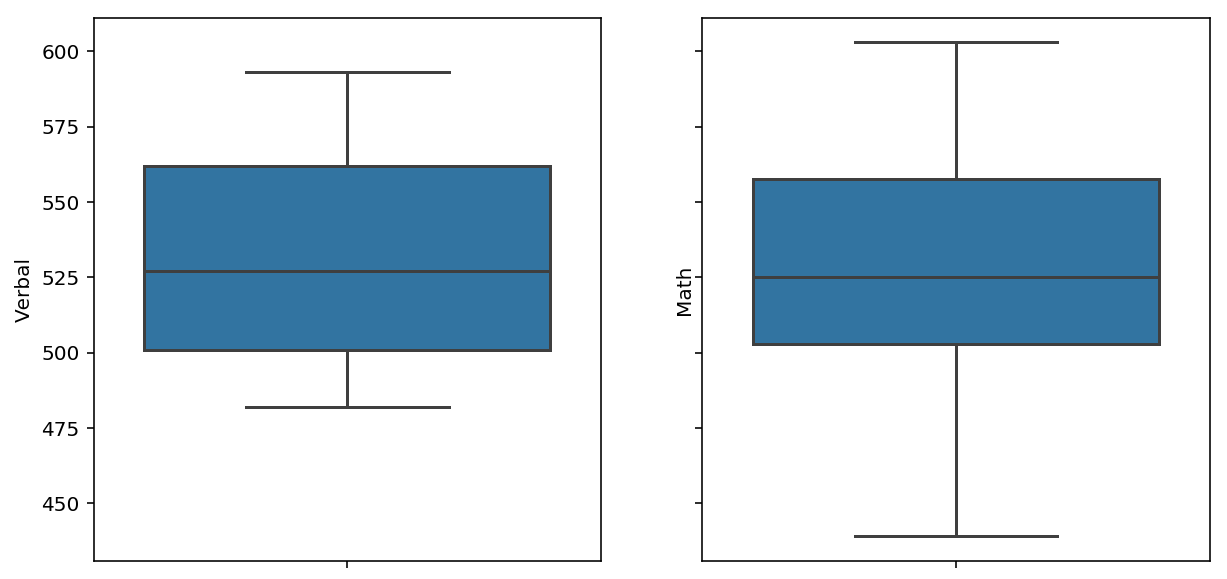

In [70]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10,5))
sns.boxplot(y = sat_df['Verbal'], ax = ax1)
sns.boxplot(y = sat_df['Math'], ax = ax2)

In [71]:
sat_df[['Verbal']].describe()

Verbal
count   51.000000
mean   532.529412
std     33.360667
min    482.000000
25%    501.000000
50%    527.000000
75%    562.000000
max    593.000000

Looking at the swamplot, there seems to be an outlier for Math scores. However, when the boxplot is plotted, the 'outlier' is still within the 75th percentile + 1.5 x IQR limit. Hence, there is no outlier

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


Pearson correlation measures the linear relationship between two continuous variables, while Spearman correlation measures the monotonic relationship (whether linear a not) between two continuous variables or ordinal variables. 

Spearman correlation between two variables will be high when observations have a similar rank  between the two variables, and low when observations have a dissimilar rank between the two variables.

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [72]:
rate_percentiles = [stats.percentileofscore(sat_df['Rate'],i) for i in sat_df['Rate']]
sat_df['rate_percentiles'] = rate_percentiles
sat_df.head()

State  Rate  Verbal  Math  Verbal-Math  rate_percentiles
0    CT    82     509   510           -1        100.000000
1    NJ    81     499   513          -14         98.039216
2    MA    79     511   515           -4         96.078431
3    NY    77     495   505          -10         94.117647
4    NH    72     520   516            4         92.156863

In [73]:
sat_df[['State','rate_percentiles']][sat_df['State'] == 'CA']

State  rate_percentiles
23    CA         55.882353

Percentile is related to Spearman rank correlation as it can be treated as a rank. You are then able to calculate the Spearman correlation.

In [74]:
sat_df.corr(method='spearman')

Rate    Verbal      Math  Verbal-Math  rate_percentiles
Rate              1.000000 -0.836058 -0.811662    -0.012267          1.000000
Verbal           -0.836058  1.000000  0.909413     0.042032         -0.836058
Math             -0.811662  0.909413  1.000000    -0.248781         -0.811662
Verbal-Math      -0.012267  0.042032 -0.248781     1.000000         -0.012267
rate_percentiles  1.000000 -0.836058 -0.811662    -0.012267          1.000000

In [75]:
sat_df.corr(method='pearson')

Rate    Verbal      Math  Verbal-Math  rate_percentiles
Rate              1.000000 -0.888121 -0.773419    -0.098671          0.973504
Verbal           -0.888121  1.000000  0.899909     0.044527         -0.875377
Math             -0.773419  0.899909  1.000000    -0.395574         -0.786561
Verbal-Math      -0.098671  0.044527 -0.395574     1.000000         -0.041724
rate_percentiles  0.973504 -0.875377 -0.786561    -0.041724          1.000000

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

Pearson correlation is not robust in the presence of outliers. A good example would be the 
Anscombe’s quartet.

Spearman’s rank correlation mitigates the effect of outliers and skewed distributions. By ranking each datapoint by their percentile, we are able to compute Spearman’s correlation. This will do away with outliers.

e.g. percentile = [10,20,30,90]. 10th percentile will correspond to rank 1, 20th percentile will correspond to rank 2, so on so forth.


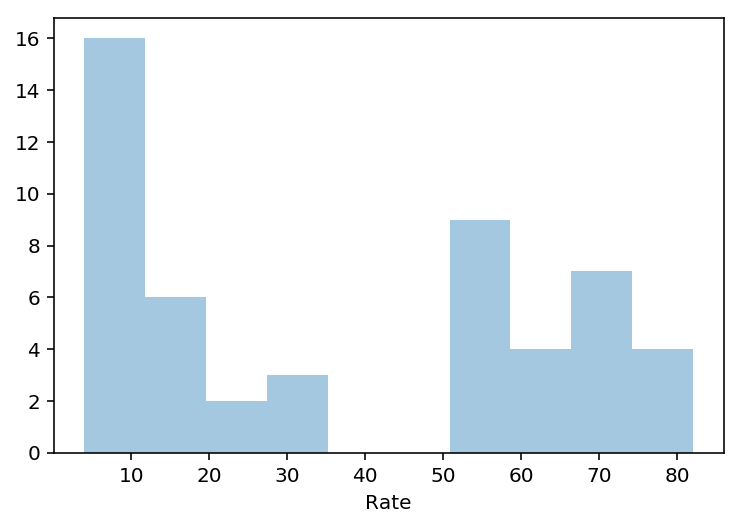

In [76]:
sns.distplot(sat_df['Rate'], kde = False, bins = 10)

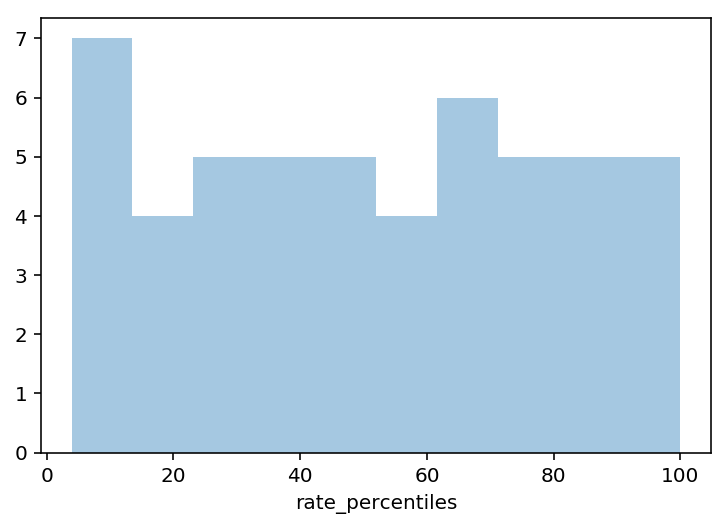

In [77]:
sns.distplot(sat_df['rate_percentiles'], kde = False, bins = 10)

We are able to see a less skewed and more normal distribution for each variable if we plot the variable percentile distribution graph.